In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np

In [2]:
with open('../../output/weights/p_date=2022-08-02-19_02_42/log.json', 'r') as f:
    data = json.load(f)
    
l = len(data["loss"])
print(f"{l} records")
print(data.keys())

17001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 500
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Minimum: {min(data.values())}")

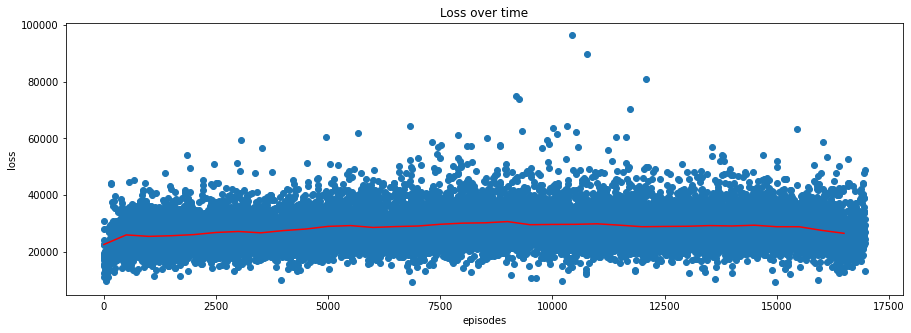

Maximum: 96294.3046875
Average: 28286.101788572178
Minimum: 9195.0205078125


In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

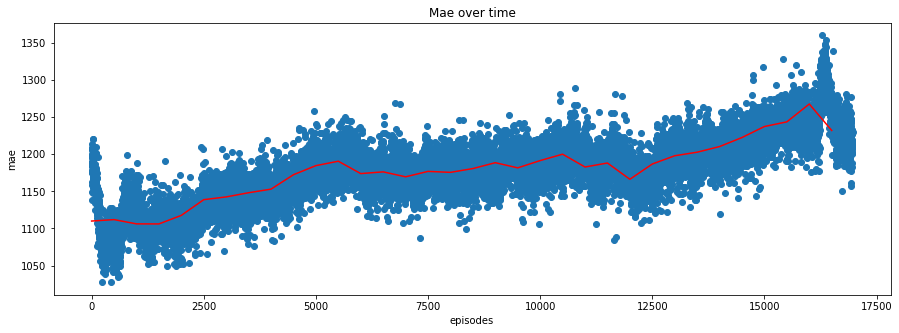

Maximum: 1360.302001953125
Average: 1177.4502331810068
Minimum: 1027.2744140625


In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

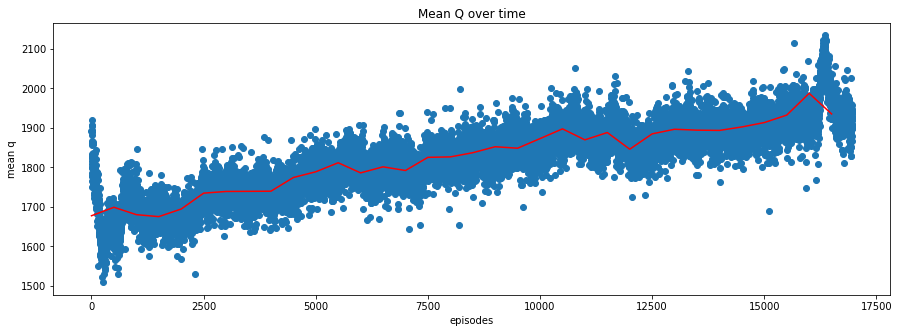

Maximum: 2134.44775390625
Average: 1821.6302102713826
Minimum: 1508.780029296875


In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

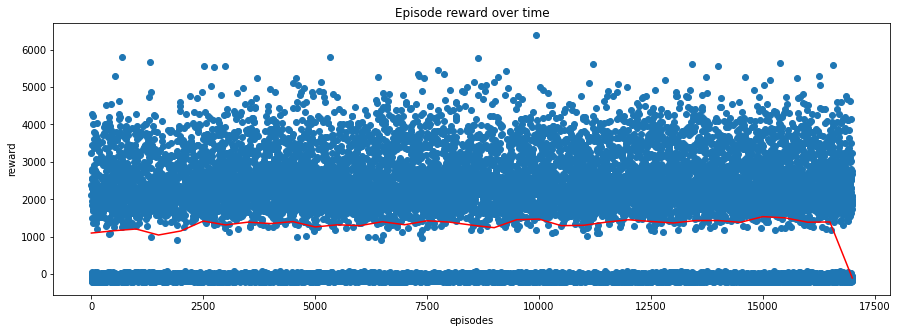

Maximum: 6378.557948717616
Average: 1345.2295069820968
Minimum: -219.40871794871794


In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

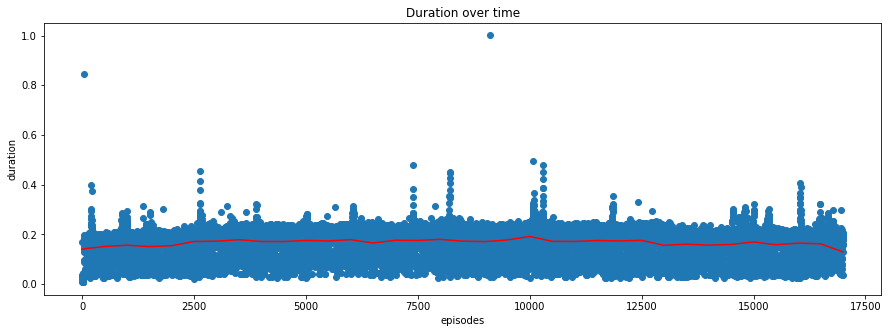

Maximum: 1.0008719820000351
Average: 0.16801307680795202
Minimum: 0.006590216000006421


In [9]:
plot(duration, "Duration over time", "episodes", "duration")

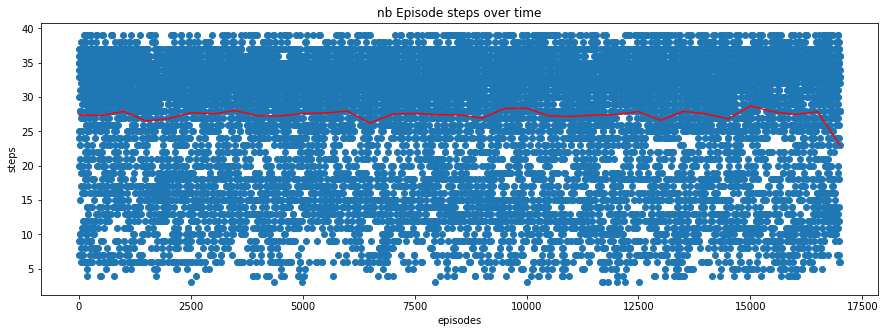

Maximum: 39
Average: 27.497794247397213
Minimum: 3


In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")